In [1]:
# Importación de paquetes y librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carga de información
data = pd.read_csv("C:\Analisis_de_datos\Regresion_Logistica\data.csv", sep=",")

In [3]:
# Verifico la información
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [81]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(data["cigsPerDay"].values.reshape(-1, 1), data["TenYearCHD"], test_size=0.2, random_state=42)

# Crear el imputador y ajustarlo a los datos de entrenamiento
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

# Aplicar la imputación a ambos conjuntos de datos
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Crear y entrenar el modelo de regresión logística con los datos imputados
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_imputed)



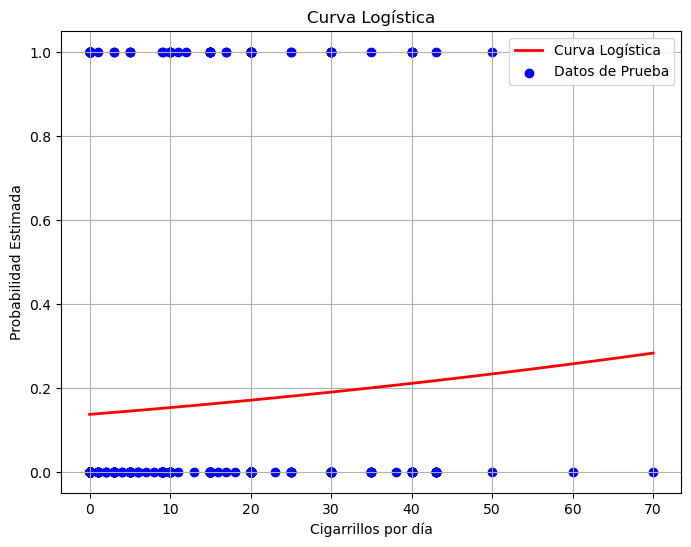

In [82]:
# Crear un rango de valores para la gráfica de la curva logística
X_range = np.linspace(X_test_imputed.min(), X_test_imputed.max(), 100)

# Calcular las probabilidades estimadas utilizando el modelo
probabilities = model.predict_proba(X_range.reshape(-1, 1))[:, 1]

# Gráfica de la curva logística
plt.figure(figsize=(8, 6))
plt.plot(X_range, probabilities, color='red', lw=2, label='Curva Logística')
plt.scatter(X_test_imputed, y_test, color='blue', label='Datos de Prueba')
plt.xlabel('Cigarrillos por día')
plt.ylabel('Probabilidad Estimada')
plt.title('Curva Logística')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# Evaluar el rendimiento del modelo en los datos de prueba
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print(f'Exactitud (Accuracy): {accuracy}')
print(f'Reporte de Clasificación:\n{report}')

Exactitud (Accuracy): 0.8537735849056604
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       1.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.93      0.50      0.46       848
weighted avg       0.88      0.85      0.79       848



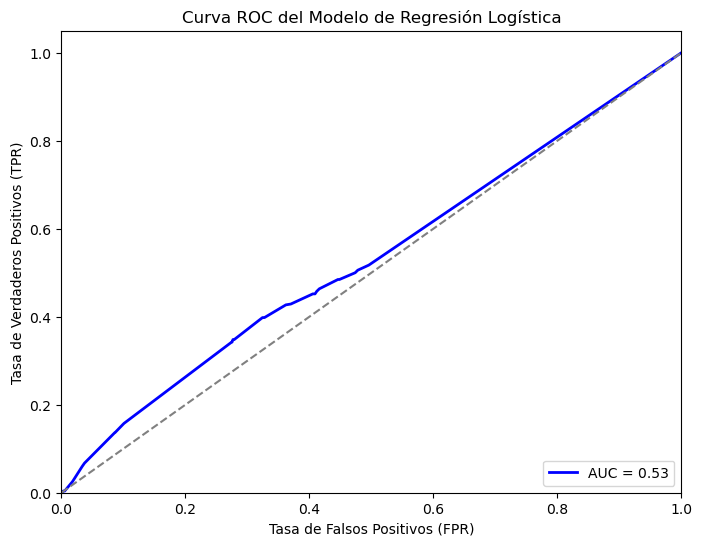

In [85]:
# Probabilidades predichas por el modelo en el conjunto de entrenamiento
probs = model.predict_proba(X_train_imputed)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, probs)

# Calcula el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_train, probs)

# Crea el gráfico de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Modelo de Regresión Logística')
plt.legend(loc="lower right")
plt.show()

In [84]:
# Conclusiones:
# El modelo cuenta con una exactitud del 85% para las probabilidades negativas de desarrollar enfermedad cardiaca.
# Sin embargo para la clase 1 no es muy confiable, posiblemente por las bajas probabilidades de desarrollar enfermedad cardiaca en 10 años.
# Analizando un par de variables para nuestra clasificación binaria la AUC indica un rendimiento deficiente del modelo.
